In [2]:
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from scipy.integrate import complex_ode
from numpy import gradient, squeeze, sqrt
from scipy.fftpack import fft, ifft,fftshift
from tqdm.notebook import tqdm
import os

plt.style.use(['science','nature','notebook'])

In [63]:
Omega_0 = 2 *np.pi
gamma = 2 *np.pi
ts = 10

In [64]:
def dSdt(t,S):
    x1,y1 = S
    return (y1, -y1*2*gamma - Omega_0*x1)

x1_0 = 1
y1_0 = 0 #dx/dt
S_0 = (x1_0, y1_0)
t = np.linspace(0, ts, 10000)
sol_ivp = solve_ivp(dSdt, t_span=(0,ts), y0=np.array(S_0, dtype='complex_'), method='DOP853', atol=1e-10, rtol=1e-10, t_eval=t) #DOP853

C:\Users\KuChris\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


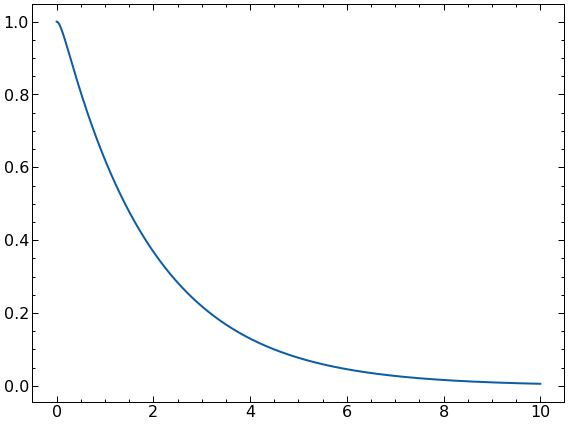

In [65]:
plt.figure()
plt.plot(sol_ivp.t, sol_ivp.y[0], label='x1')
#plt.plot(sol_ivp.t, sol_ivp.y[1], label='dx1')
plt.tight_layout()

In [10]:
ts = 6
#Overdamped case
Omega_0 = 1 * 2 *np.pi
gamma = 1.5 * 2 *np.pi

def dSdt(t,S):
    x1,y1 = S
    return (y1, -y1*gamma - (Omega_0**2)*x1)

x1_0 = 1
y1_0 = 0 #dx/dt
S_0 = (x1_0, y1_0)
t = np.linspace(0, ts, 100000)
sol_ivp1 = solve_ivp(dSdt, t_span=(0,ts), y0=np.array(S_0, dtype='complex_'), method='DOP853', atol=1e-10, rtol=1e-10, t_eval=t) #DOP853


#Critically damped case
Omega_0 = 1 * 2 *np.pi
gamma = 1 * 2 *np.pi


def dSdt(t,S):
    x1,y1 = S
    return (y1, -y1*gamma - (Omega_0**2)*x1)

x1_0 = 1
y1_0 = 0 #dx/dt
S_0 = (x1_0, y1_0)
t = np.linspace(0, ts, 100000)
sol_ivp2 = solve_ivp(dSdt, t_span=(0,ts), y0=np.array(S_0, dtype='complex_'), method='DOP853', atol=1e-10, rtol=1e-10, t_eval=t) #DOP853


#Underdamped case
Omega_0 = 1 * 2 *np.pi
gamma = 0.3 * 2 *np.pi


def dSdt(t,S):
    x1,y1 = S
    return (y1, -y1*gamma - (Omega_0**2)*x1)

x1_0 = 1
y1_0 = 0 #dx/dt
S_0 = (x1_0, y1_0)
t = np.linspace(0, ts, 100000)
sol_ivp3 = solve_ivp(dSdt, t_span=(0,ts), y0=np.array(S_0, dtype='complex_'), method='DOP853', atol=1e-10, rtol=1e-10, t_eval=t) #DOP853

#Undamped case
Omega_0 = 1 * 2 *np.pi
gamma = 0


def dSdt(t,S):
    x1,y1 = S
    return (y1, -y1*gamma - (Omega_0**2)*x1)

x1_0 = 1
y1_0 = 0 #dx/dt
S_0 = (x1_0, y1_0)
t = np.linspace(0, ts, 100000)
sol_ivp4 = solve_ivp(dSdt, t_span=(0,ts), y0=np.array(S_0, dtype='complex_'), method='DOP853', atol=1e-10, rtol=1e-10, t_eval=t) #DOP853

C:\Users\KuChris\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\KuChris\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\KuChris\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\KuChris\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


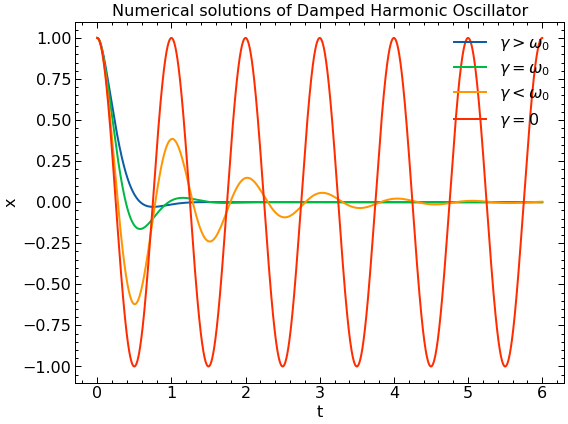

In [13]:
plt.figure()
plt.plot(sol_ivp1.t, sol_ivp1.y[0], label='$\gamma > \omega_0$')
#plt.plot(sol_ivp1.t, sol_ivp1.y[1], label='dx1')
plt.plot(sol_ivp2.t, sol_ivp2.y[0], label='$\gamma = \omega_0$')
#plt.plot(sol_ivp2.t, sol_ivp2.y[1], label='dx2')
plt.plot(sol_ivp3.t, sol_ivp3.y[0], label='$\gamma < \omega_0$')
#plt.plot(sol_ivp3.t, sol_ivp3.y[1], label='dx3')
plt.plot(sol_ivp4.t, sol_ivp4.y[0], label='$\gamma = 0$')
#plt.plot(sol_ivp3.t, sol_ivp3.y[1], label='dx3')
plt.title('Numerical solutions of Damped Harmonic Oscillator')
plt.xlabel('t')
plt.ylabel('x')
plt.legend(loc=1)
plt.tight_layout()

savepath = os.path.abspath(r'G:\My Drive\Project\EIT\paper')
plt.savefig(os.path.join(savepath, 'Figure_02coupled03.pdf'))

In [8]:
Omega_0 = 10 * 2 * np.pi
gamma = 0.1 * 2 * np.pi
x0 = 0.0001
Omega_d = 10 * 2 * np.pi
phi = 0

ts = 100

def dSdt(t,S):
    x1,y1 = S
    return (y1, -2*y1*gamma - (Omega_0**2)*x1 + (Omega_0**2)*x0*np.cos(Omega_d*t-phi))

x1_0 = 1
y1_0 = 0 #dx/dt
S_0 = (x1_0, y1_0)
tn = 100000
t = np.linspace(0, ts, tn)
sol_ivp0 = solve_ivp(dSdt, t_span=(0,ts), y0=np.array(S_0, dtype='complex_'), method='DOP853', atol=1e-10, rtol=1e-10, t_eval=t) #DOP853

C:\Users\KuChris\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


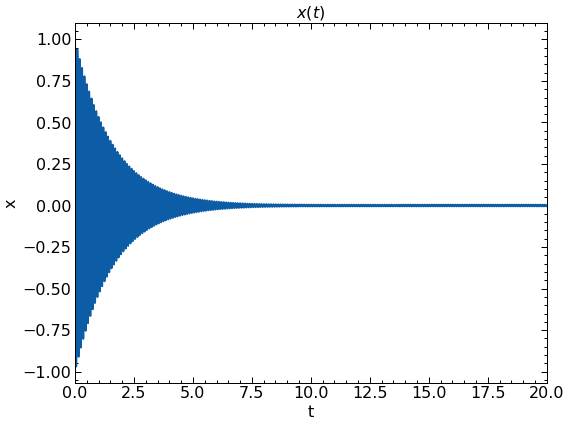

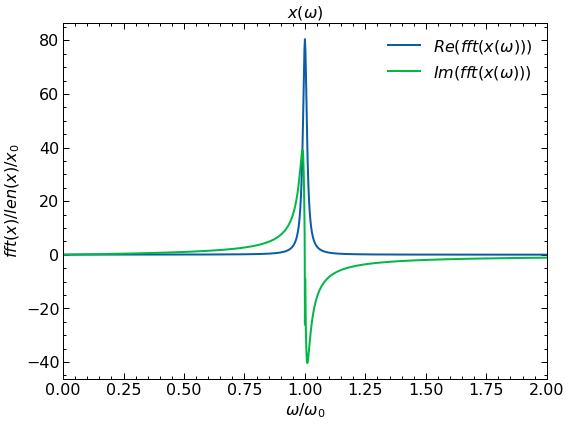

In [9]:
plt.figure()
plt.plot(sol_ivp0.t, sol_ivp0.y[0], label='$\gamma > \omega_0$')
#plt.plot(sol_ivp1.t, sol_ivp1.y[1], label='dx1')
plt.xlim(0,20)
plt.xlabel(r't')
plt.ylabel(r'x')
plt.title(r'$x(t)$')
plt.tight_layout()
savepath = os.path.abspath(r'G:\My Drive\Project\EIT\paper')
plt.savefig(os.path.join(savepath, 'Figure_04Driven01.pdf'))

plt.figure()
X0 = fft(np.real(sol_ivp0.y[0,:]))
N = len(X0)
n = np.arange(N)
T = ts
freq = 2*np.pi*n/T

plt.plot(freq/Omega_0, ((np.real(fft(sol_ivp0.y[0,:]))) /tn/x0), label='$Re(fft(x(\omega)))$')

plt.plot(freq/Omega_0, ((np.imag(fft(sol_ivp0.y[0,:]))) /tn/x0), label='$Im(fft(x(\omega)))$')

plt.xlim(0,2)
plt.xlabel(r'$\omega / \omega_0$')
plt.ylabel(r'$fft(x)/len(x)/x_0$')
plt.title(r'$x(\omega)$')
plt.legend()
plt.tight_layout()
savepath = os.path.abspath(r'G:\My Drive\Project\EIT\paper')
plt.savefig(os.path.join(savepath, 'Figure_04Driven02.pdf'))

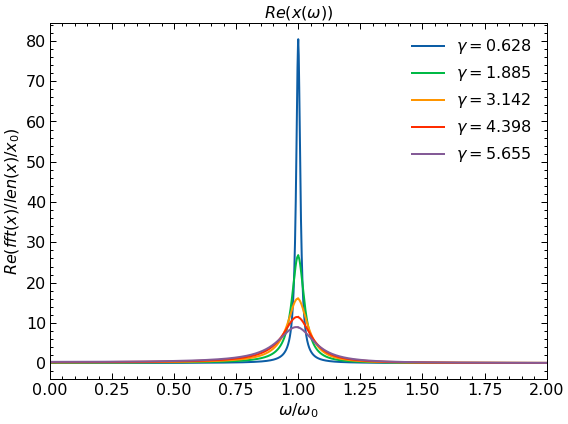

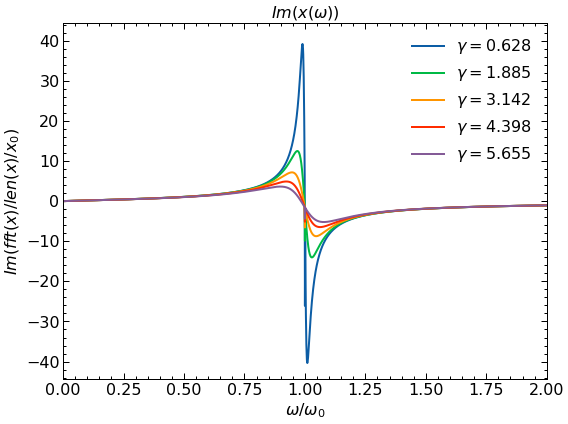

In [14]:
#n
plt.figure()
for gamma in [0.1 * 2 *np.pi, 0.3 * 2 *np.pi, 0.5 * 2 *np.pi, 0.7 * 2 *np.pi, 0.9 * 2 *np.pi]:
    Omega_0 = 10*2 *np.pi
    x0 = 0.0001
    Omega_d = 10*2 * np.pi *1
    phi = 0
    ts = 100

    def dSdt(t,S):
        x1,y1 = S
        return (y1, -2*y1*gamma - (Omega_0**2)*x1 + (Omega_0**2)*x0*np.cos(Omega_d*t-phi))

    x1_0 = 1
    y1_0 = 0 #dx/dt
    S_0 = (x1_0, y1_0)
    tn = 100000
    t = np.linspace(0, ts, tn)
    sol_ivp0 = solve_ivp(dSdt, t_span=(0,ts), y0=np.array(S_0, dtype='complex_'), method='DOP853', atol=1e-10, rtol=1e-10, t_eval=t) #DOP853

    # plt.figure()
    # plt.plot(sol_ivp0.t, sol_ivp0.y[0], label='$\gamma > \omega_0$')
    # #plt.plot(sol_ivp1.t, sol_ivp1.y[1], label='dx1')
    # plt.xlim(0,20)

    X0 = fft(np.real(sol_ivp0.y[0,:]))
    N = len(X0)
    n = np.arange(N)
    T = ts
    freq = 2*np.pi*n/T

    #plt.plot(freq/Omega_0, (np.imag(fft(sol_ivp0.y[0,:]))) /tn)
    plt.plot(freq/Omega_0, (np.real(fft(sol_ivp0.y[0,:]))) /tn /x0, label='$\gamma = {:.3f}$'.format(gamma))
    plt.xlim(0,2)
    plt.xlabel(r'$\omega / \omega_0$')
    plt.ylabel(r'$Re(fft(x)/len(x)/x_0)$')
    plt.title(r'$Re(x(\omega))$')
    plt.legend()
    plt.tight_layout()

savepath = os.path.abspath(r'G:\My Drive\Project\EIT\paper')
plt.savefig(os.path.join(savepath, 'Figure_04Driven03.pdf'))
    

#n
plt.figure()
for gamma in [0.1 * 2 *np.pi, 0.3 * 2 *np.pi, 0.5 * 2 *np.pi, 0.7 * 2 *np.pi, 0.9 * 2 *np.pi]:
    Omega_0 = 10*2 *np.pi
    x0 = 0.0001
    Omega_d = 10*2 * np.pi *1
    phi = 0
    ts = 100

    def dSdt(t,S):
        x1,y1 = S
        return (y1, -2*y1*gamma - (Omega_0**2)*x1 + (Omega_0**2)*x0*np.cos(Omega_d*t-phi))

    x1_0 = 1
    y1_0 = 0 #dx/dt
    S_0 = (x1_0, y1_0)
    tn = 100000
    t = np.linspace(0, ts, tn)
    sol_ivp0 = solve_ivp(dSdt, t_span=(0,ts), y0=np.array(S_0, dtype='complex_'), method='DOP853', atol=1e-10, rtol=1e-10, t_eval=t) #DOP853

    # plt.figure()
    # plt.plot(sol_ivp0.t, sol_ivp0.y[0], label='$\gamma > \omega_0$')
    # #plt.plot(sol_ivp1.t, sol_ivp1.y[1], label='dx1')
    # plt.xlim(0,20)

    X0 = fft(np.real(sol_ivp0.y[0,:]))
    N = len(X0)
    n = np.arange(N)
    T = ts
    freq = 2*np.pi*n/T

    plt.plot(freq/Omega_0, (np.imag(fft(sol_ivp0.y[0,:]))) /tn /x0, label='$\gamma = {:.3f}$'.format(gamma))
    #plt.plot(freq/Omega_0, (np.real(fft(sol_ivp0.y[0,:]))) /tn)
    plt.xlim(0,2)
    plt.xlabel(r'$\omega / \omega_0$')
    plt.ylabel(r'$Im(fft(x)/len(x)/x_0)$')
    plt.title(r'$Im(x(\omega))$')
    plt.legend()
    plt.tight_layout()

savepath = os.path.abspath(r'G:\My Drive\Project\EIT\paper')
plt.savefig(os.path.join(savepath, 'Figure_04Driven04.pdf'))